In [1]:
from selenium import webdriver
import time
import random
from bs4 import BeautifulSoup
import re
from datetime import datetime
import json
import pandas as pd

In [5]:
fname = './data/검색결과_애견샴푸_1000_12111321.csv'
datas = pd.read_csv(fname, encoding = 'utf-8-sig')

CParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 5


### 검색결과 불러오기

In [127]:
insta = Insta_Crawling()
fname = './data/검색결과_애견샴푸_1000_12111321.csv'
%time datas = insta.load_datas_csv(fname)

CParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 5


In [4]:
print(len(datas))

1000


In [5]:
datas.head()

,writer,article,likes,replys_count,replys,datetime,img,tags
0,comeon_yo8282,이사+공사비용 모으기 바자회#애견샴푸 퍼피샤워 비누와 아인솝 비누 두가지 합쳐서 2...,80,1,'0',2017-12-10 11:39,https://scontent-icn1-1.cdninstagram.com/t51.2...,'#애견샴푸'
1,dogjoang,개거품비누 실험 <장미꽃테스트>개거품비누vs애견샴푸2일차1.활짝폈던 장미가 조금씩 ...,170,1,'0',2017-06-08 13:28,https://scontent-icn1-1.cdninstagram.com/t51.2...,"'#개거품비누', '#애견샴푸', '#개좋음', '#개거품비누테스트', '#장미꽃실험'"
2,heeeeyun,아 간편하넹 애견샴푸 이건 찜 ! #애견샴푸 #만능워터리샴푸 #애견,"3,097",6,"(1, 'ibkdrgn8', '🐶かわいい❤️❤️❤️'), (2, 'kaepi.95'...",2017-10-20 06:16,https://scontent-icn1-1.cdninstagram.com/t51.2...,"'#애견샴푸', '#만능워터리샴푸', '#애견'"
3,ainsoap_,@Regrann from @jeje_chuchu - ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀다...,665,4,"(1, 'ainsoap_', '#아인솝순한샴푸#애견샴푸#장모샴푸#강아지그램#반려동물...",2017-12-09 12:23,https://scontent-icn1-1.cdninstagram.com/t51.2...,"'#아인솝', '#아인솝샴푸모질이', '#ainsoap', '#강아지샴푸', '#강..."
4,hoyagun,젬마의 일용할 양식들 감사합니다 @natural_balance_korea 👍🏼👍🏼 ...,139,3,"(1, 'stellakola', '꺍!!! 부자된기분이시겠어요~~ #개부럽 ㅋㅋ 참...",2016-11-14 05:36,https://scontent-icn1-1.cdninstagram.com/t51.2...,"'#애견사료', '#애견간식', '#네츄럴발란스', '#naturalbalance'..."


In [102]:
datas.dtypes

writer          object
article         object
likes           object
replys_count     int64
replys          object
datetime        object
img             object
tags            object
day             object
dtype: object

In [87]:
datas.keys().values  # ['writer', 'article', 'likes', 'replys_count', 'replys', 'datetime','img', 'tags', 'day']

array(['writer', 'article', 'likes', 'replys_count', 'replys', 'datetime',
       'img', 'tags', 'day'], dtype=object)

In [103]:
datas[['likes','replys_count']].fillna(0).head()

,likes,replys_count
0,80,1
1,170,1
2,"3,097",6
3,665,4
4,139,3


In [109]:
datas['likes_edit'] = [string.replace(',','') for string in datas['likes']]

In [111]:
del datas['likes']
datas.head()


,writer,article,replys_count,replys,datetime,img,tags,day,likes_edit
0,comeon_yo8282,이사+공사비용 모으기 바자회#애견샴푸 퍼피샤워 비누와 아인솝 비누 두가지 합쳐서 2...,1,'0',2017-12-10 11:39,https://scontent-icn1-1.cdninstagram.com/t51.2...,'#애견샴푸',2017-12-10,80
1,dogjoang,개거품비누 실험 <장미꽃테스트>개거품비누vs애견샴푸2일차1.활짝폈던 장미가 조금씩 ...,1,'0',2017-06-08 13:28,https://scontent-icn1-1.cdninstagram.com/t51.2...,"'#개거품비누', '#애견샴푸', '#개좋음', '#개거품비누테스트', '#장미꽃실험'",2017-06-08,170
2,heeeeyun,아 간편하넹 애견샴푸 이건 찜 ! #애견샴푸 #만능워터리샴푸 #애견,6,"(1, 'ibkdrgn8', '🐶かわいい❤️❤️❤️'), (2, 'kaepi.95'...",2017-10-20 06:16,https://scontent-icn1-1.cdninstagram.com/t51.2...,"'#애견샴푸', '#만능워터리샴푸', '#애견'",2017-10-20,3097
3,ainsoap_,@Regrann from @jeje_chuchu - ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀다...,4,"(1, 'ainsoap_', '#아인솝순한샴푸#애견샴푸#장모샴푸#강아지그램#반려동물...",2017-12-09 12:23,https://scontent-icn1-1.cdninstagram.com/t51.2...,"'#아인솝', '#아인솝샴푸모질이', '#ainsoap', '#강아지샴푸', '#강...",2017-12-09,665
4,hoyagun,젬마의 일용할 양식들 감사합니다 @natural_balance_korea 👍🏼👍🏼 ...,3,"(1, 'stellakola', '꺍!!! 부자된기분이시겠어요~~ #개부럽 ㅋㅋ 참...",2016-11-14 05:36,https://scontent-icn1-1.cdninstagram.com/t51.2...,"'#애견사료', '#애견간식', '#네츄럴발란스', '#naturalbalance'...",2016-11-14,139


In [116]:
datas.columns.values

array(['writer', 'article', 'replys_count', 'replys', 'datetime', 'img',
       'tags', 'day', 'likes'], dtype=object)

In [119]:
datas['likes'] = datas.likes_edit

In [125]:
del datas['likes']

In [126]:
datas.dtypes

writer          object
article         object
replys_count     int64
replys          object
datetime        object
img             object
tags            object
day             object
dtype: object

In [115]:
datas['likes'].astype(int)

KeyError: 'likes'

### 시계열 분석하기

In [19]:
datas['day'] = [date[:10] for date in datas['datetime']]    # #월/일 값만 추가  2017-11-25형태

In [77]:
datas.head()

,writer,article,likes,replys_count,replys,datetime,img,tags,day
0,comeon_yo8282,이사+공사비용 모으기 바자회#애견샴푸 퍼피샤워 비누와 아인솝 비누 두가지 합쳐서 2...,80,1,'0',2017-12-10 11:39,https://scontent-icn1-1.cdninstagram.com/t51.2...,'#애견샴푸',2017-12-10
1,dogjoang,개거품비누 실험 <장미꽃테스트>개거품비누vs애견샴푸2일차1.활짝폈던 장미가 조금씩 ...,170,1,'0',2017-06-08 13:28,https://scontent-icn1-1.cdninstagram.com/t51.2...,"'#개거품비누', '#애견샴푸', '#개좋음', '#개거품비누테스트', '#장미꽃실험'",2017-06-08
2,heeeeyun,아 간편하넹 애견샴푸 이건 찜 ! #애견샴푸 #만능워터리샴푸 #애견,"3,097",6,"(1, 'ibkdrgn8', '🐶かわいい❤️❤️❤️'), (2, 'kaepi.95'...",2017-10-20 06:16,https://scontent-icn1-1.cdninstagram.com/t51.2...,"'#애견샴푸', '#만능워터리샴푸', '#애견'",2017-10-20
3,ainsoap_,@Regrann from @jeje_chuchu - ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀다...,665,4,"(1, 'ainsoap_', '#아인솝순한샴푸#애견샴푸#장모샴푸#강아지그램#반려동물...",2017-12-09 12:23,https://scontent-icn1-1.cdninstagram.com/t51.2...,"'#아인솝', '#아인솝샴푸모질이', '#ainsoap', '#강아지샴푸', '#강...",2017-12-09
4,hoyagun,젬마의 일용할 양식들 감사합니다 @natural_balance_korea 👍🏼👍🏼 ...,139,3,"(1, 'stellakola', '꺍!!! 부자된기분이시겠어요~~ #개부럽 ㅋㅋ 참...",2016-11-14 05:36,https://scontent-icn1-1.cdninstagram.com/t51.2...,"'#애견사료', '#애견간식', '#네츄럴발란스', '#naturalbalance'...",2016-11-14


In [76]:
datas.

<bound method NDFrame.describe of                   writer                                            article  \
0          comeon_yo8282  이사+공사비용 모으기 바자회#애견샴푸 퍼피샤워 비누와 아인솝 비누 두가지 합쳐서 2...   
1               dogjoang  개거품비누 실험 <장미꽃테스트>개거품비누vs애견샴푸2일차1.활짝폈던 장미가 조금씩 ...   
2               heeeeyun              아 간편하넹 애견샴푸 이건 찜 ! #애견샴푸 #만능워터리샴푸 #애견   
3               ainsoap_  @Regrann from @jeje_chuchu - ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀다...   
4                hoyagun  젬마의 일용할 양식들 감사합니다 @natural_balance_korea 👍🏼👍🏼 ...   
5                 ang2ne  물 없이 목욕 시키기..ㅋㅋㅋ귀차니즘 주인들에게도 딱일듯요!!목욕시켜도 하루도 못 ...   
6          hagundan_papa   강아지 천연비누 #버블부들#강아지샴푸 #애견샴푸 #버블부들 #강아지천연비누 #스킨365   
7               alvl0118  몇년째 쓰고있는 강아지샴푸다른 샴푸보다 향도 오래가고달콤하고시원한 향도 굿~!!너무...   
8              isora2564  해피랑,애견간식 더 다양해졌어요애견용품도 생겼고요고양이모래,간식도 있어요추천하거나 ...   
9         bobathechowtea  차우차우는 털이 생명!! 일반 #애견샴푸 는 계면활성제가 들어있고 #강아지 들은 피...   
10                wl5965  향이 너무 조아~^^ 나도 모르게 사고있었다는...키치 샴푸 피부 언넝 나아라 빨리...   
11              jo

In [16]:
datas.columns.values   # column name 조회하기

array(['writer', 'article', 'likes', 'replys_count', 'replys', 'datetime',
       'img', 'tags', 'day', 'day'], dtype=object)

In [10]:
datas.columns.values[-1] = 'day'      # column name 변경하기

In [17]:
del datas['day']

In [8]:
# pandas --> 리스트 --> 시리즈 --> df 추가 하는 형태
# datas['day'] = [date[:10] for date in datas['datetime']]  와 동일함

dates = datas['datetime'].tolist()

day = []
for date in dates:
#     print(date)
    day.append(date[:10])
print(day[:10])

datas['day'] = pd.Series(day)  #월/일 값만 추가  2017-11-25형태

['2017-12-10', '2017-06-08', '2017-10-20', '2017-12-09', '2016-11-14', '2017-10-16', '2017-10-28', '2017-12-04', '2017-11-25', '2017-12-11']


In [30]:
datas['day'].head()

0    2017-12-10
1    2017-06-08
2    2017-10-20
3    2017-12-09
4    2016-11-14
Name: day, dtype: object

In [22]:
# 일자별 포스팅 글 수를 구한다
day_count = datas.groupby(datas['day'])['article'].count()
day_count.sort_values(ascending= 0)
day_count.head()

day
2016-11-14     1
2017-06-08     1
2017-07-24     3
2017-07-25    11
2017-07-26     4
Name: article, dtype: int64

In [32]:
# 일자별 댓글 합계를 구한다
replys_count = datas.groupby(datas['day'])['replys_count'].sum()
replys_count.sort_values()
replys_count.head()


day
2016-11-14     3
2017-06-08     1
2017-07-24    13
2017-07-25    31
2017-07-26    22
Name: replys_count, dtype: int64

In [83]:
datas.dtypes

writer          object
article         object
likes           object
replys_count     int64
replys          object
datetime        object
img             object
tags            object
day             object
dtype: object

In [75]:
likes_count = datas.groupby(datas['day'])['likes'].sum()
likes_count.sort_values()
likes_count.head()

day
2016-11-14                       139
2017-06-08                       170
2017-07-24                    691624
2017-07-25    1149325275468163061327
2017-07-26                 211035072
Name: likes, dtype: object

In [42]:
trends = pd.DataFrame()
trends['replys_count'] = replys_count
trends['article']  =day_count

In [72]:
trends['likes'] = likes_count

In [73]:
trends.head()

,replys_count,article,sum,likes
day,,,,
2016-11-14,3,1,4,139
2017-06-08,1,1,2,170
2017-07-24,13,3,16,691624
2017-07-25,31,11,42,1149325275468163061327
2017-07-26,22,4,26,211035072


In [43]:
trends['sum'] = trends['article'] + trends['replys_count']
trends.head()

,replys_count,article,sum
day,,,
2016-11-14,3,1,4
2017-06-08,1,1,2
2017-07-24,13,3,16
2017-07-25,31,11,42
2017-07-26,22,4,26


In [54]:
trends_top_day = trends.sort_values('sum', ascending=0).head(10).index.values

In [55]:
print(trends_top_day)

['2017-11-25' '2017-11-09' '2017-10-18' '2017-11-24' '2017-10-26'
 '2017-11-03' '2017-08-08' '2017-11-26' '2017-11-07' '2017-09-27']


In [67]:
trends.index

Index(['2016-11-14', '2017-06-08', '2017-07-24', '2017-07-25', '2017-07-26',
       '2017-07-27', '2017-07-28', '2017-07-29', '2017-07-30', '2017-07-31',
       ...
       '2017-12-02', '2017-12-03', '2017-12-04', '2017-12-05', '2017-12-06',
       '2017-12-07', '2017-12-08', '2017-12-09', '2017-12-10', '2017-12-11'],
      dtype='object', name='day', length=137)

In [74]:
datas[datas.day == '2017-07-25']

,writer,article,likes,replys_count,replys,datetime,img,tags,day
986,we_frnz,"행운인 영화감상중(오, 우리 개님🙄)",114,4,"(1, 'we_frnz', '#doglover #애견인 #반려견 #wefrnz #위...",2017-07-25 23:31,https://scontent-icn1-1.cdninstagram.com/t51.2...,NaN,2017-07-25
987,kim_mi_ae1,닝겐~!목욕시작 해보시게 🛁.미세먼지를 날려버릴 #휘슬샴푸 순한 샴푸라 자극이 없개...,93,6,"(1, 'yoonhye1030', '저희 맞팔할까요?'), (2, 'mir_silv...",2017-07-25 16:08,https://scontent-icn1-1.cdninstagram.com/t51.2...,"'#휘슬샴푸', '#포메라니안', '#포메', '#포메라이언', '#견스타그램', ...",2017-07-25
988,nature.petglish,#Repost @id_like_to_be_happy (@get_repost)・・・@...,25,1,"(1, 'vitabrid12', '소통하러 왔어요~~')",2017-07-25 11:04,https://scontent-icn1-1.cdninstagram.com/t51.2...,"'#Repost', '#네이쳐펫글리쉬', '#이벤트', '#애견샴푸', '#천연샴푸...",2017-07-25
989,happydallkong,우리집 #못난이 #아들 #목욕 하는 날#꼬질꼬질 #때꾸정물 이 #대애박~~~!! ㅎ...,27,6,"(1, 'ipadgod', '얘가 기니피그 라고 하는 군요?!'), (2, 'hap...",2017-07-25 10:05,https://scontent-icn1-1.cdninstagram.com/t51.2...,"'#못난이', '#아들', '#목욕', '#꼬질꼬질', '#때꾸정물', '#대애박'...",2017-07-25
990,rnfxoddl,우리보리 존잘미남.오늘 목욕은 너닷!!!ㅎㅎㅎ#펫스타그램 #애견샴푸 #하이포닉,5,1,'0',2017-07-25 07:49,https://scontent-icn1-1.cdninstagram.com/t51.2...,"'#펫스타그램', '#애견샴푸', '#하이포닉'",2017-07-25
991,rnfxoddl,우리 복길이 존잘 사진ㅋ어제 목욕하고 뽀송한 상태에서 찍었드니 더더 이쀼당😍😍😍😍😍...,4,1,'0',2017-07-25 07:48,https://scontent-icn1-1.cdninstagram.com/t51.2...,"'#펫스타그램', '#애견샴푸', '#하이포닉'",2017-07-25
992,g_r_hana,".가이아로 천연 샴푸 , 린스에요 아이들에게 안좋은건 하나도 들어가지 않고 천연재료...",68,6,"(1, 'lsm4936', '써보고 싶은데...ㅎㅎ집에 쌓여있어서리ㅠ'), (2, ...",2017-07-25 06:26,https://scontent-icn1-1.cdninstagram.com/t51.2...,"'#가이아로', '#천연샴푸', '#애견미용', '#독스타그램', '#멍스타그램',...",2017-07-25
993,id_like_to_be_happy,@nature.petglish @네이쳐펫글리쉬 #네이쳐펫글리쉬 #이벤트 #애견샴푸 ...,16,1,'0',2017-07-25 05:54,https://scontent-icn1-1.cdninstagram.com/t51.2...,"'#네이쳐펫글리쉬', '#이벤트', '#애견샴푸', '#천연샴푸토욜날', '#가루탱...",2017-07-25
994,ari.rang,#미세먼지 씻어내는 #강아지목욕법 보기 👉http://blog.naver.com/j...,306,1,"(1, 'luv.cosmetic_', '🏻인스타 잘보고 가요~ㅎ')",2017-07-25 04:38,https://scontent-icn1-1.cdninstagram.com/t51.2...,"'#미세먼지', '#강아지목욕법', '#휘슬', '#whistle', '#휘슬샴푸'...",2017-07-25
995,love_francoispet,#프랑소와펫 실제고객님후기😊✔️강아지도 더위 타는거 알고계신가요?✔️더위를 잊게 만...,132,3,"(1, 'love_francoispet', '#강아지#말티스타그램#말티스타그램 #개...",2017-07-25 01:36,https://scontent-icn1-1.cdninstagram.com/t51.2...,'#프랑소와펫',2017-07-25


In [33]:
trends['sum'].max()

176

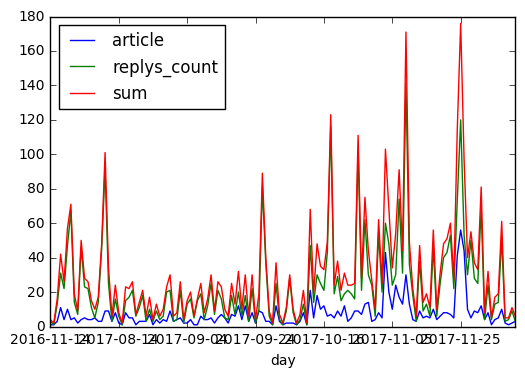

In [34]:
%matplotlib inline
# trends.plot(y = ['article','replys_count','sum'], ylim=(0,trends['sum'].max()))

trends.plot(y = ['article','replys_count','sum'])
# trends.plot()   # 위와 동일함


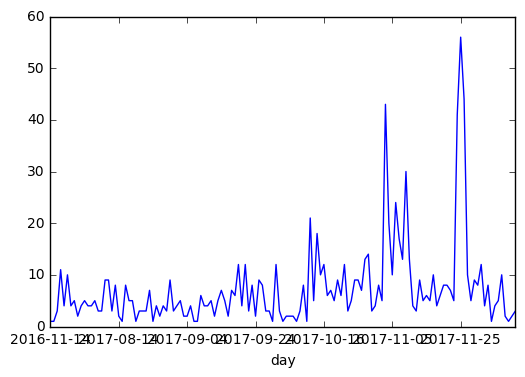

In [35]:
trends['article'].plot()

### 태그 분석하기: 빈도수

In [36]:
tag_lists = datas['tags'].tolist()

In [37]:
tag_lists[:5]

["'#애견샴푸'",
 "'#개거품비누', '#애견샴푸', '#개좋음', '#개거품비누테스트', '#장미꽃실험'",
 "'#애견샴푸', '#만능워터리샴푸', '#애견'",
 "'#아인솝', '#아인솝샴푸모질이', '#ainsoap', '#강아지샴푸', '#강아지천연샴푸', '#강아지반신욕', '#강아지목욕', '#강아지', '#반려견', '#dogshower', '#dogmovie', '#dogstagram', '#regrann'",
 "'#애견사료', '#애견간식', '#네츄럴발란스', '#naturalbalance', '#애견샴푸'"]

In [38]:
from collections import Counter

In [80]:
tag_counts = Counter()
for tags in tag_lists:
    try: tag_counts.update(tags.replace("'",'').replace(' ','').strip().split(','),)
    except: continue


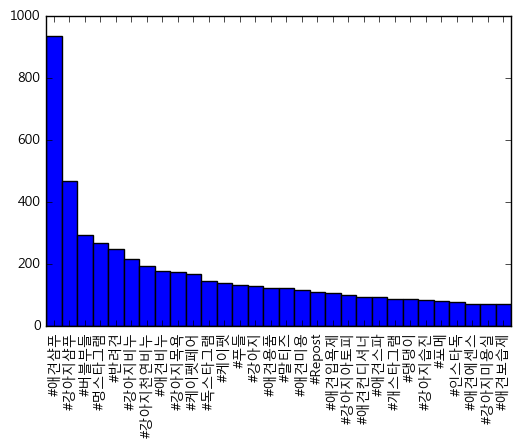

In [82]:
# 태그 그림그리기
import numpy as np
import matplotlib.pyplot as plt

labels = []
values = []
for tag_counts in tag_counts.most_common(30):
    label, value = tag_counts
    labels.append(label)
    values.append(value)

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels, rotation='90')


plt.show()


### 태그분석하기

### tag분석: 워드클라우드

In [110]:
# 데이터분석: 태그
datas_tags = datas['tags']
datas_tags = datas_tags.dropna().tolist()

tags=[]
for data in datas_tags:
    for tag in data.replace("'",'').split(','):
        tags.append(tag.strip())
#     print(data['tags'])
print(len(tags))
print(tags[:10])

8067
['#망원동', '#모던죽집', '#스믓스', '#망원동꽃집', '#선산동맛집', '#망원동맛집', '#족발맛집', '#맛집탐방', '#일상', '#데일리']


In [102]:
%matplotlib inline

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [111]:
from collections import Counter

# 빈도 높은 단어들만 가져오기
words_count=Counter()
words_count.update(tags)

words_most = []
words_most_onlyword=[]
for word,count in words_count.most_common(1000):
    words_most.append((word,count))
    words_most_onlyword.append(word)
    
print(words_most[:100])  

[('#망원동맛집', 580), ('#망원동', 280), ('#먹스타그램', 137), ('#망리단길', 127), ('#맛스타그램', 126), ('#일상', 101), ('#맛집', 78), ('#망원동카페', 64), ('#홍대맛집', 56), ('#daily', 52), ('#데일리', 51), ('#망원', 50), ('#먹방', 47), ('#망리단길맛집', 45), ('#소통', 43), ('#합정맛집', 43), ('#홍대', 39), ('#망원맛집', 36), ('#맞팔', 34), ('#데이트', 33), ('#foodstagram', 29), ('#술스타그램', 27), ('#망원시장', 25), ('#좋아요', 24), ('#서울', 24), ('#food', 24), ('#로사미나미', 23), ('#망원역맛집', 23), ('#와인', 23), ('#합정', 23), ('#점심', 23), ('#instafood', 22), ('#맛있다그램', 21), ('#선팔', 21), ('#일상스타그램', 19), ('#맛집투어', 18), ('#먹스타', 18), ('#망원역', 18), ('#디저트', 18), ('#ootd', 18), ('#서울맛집', 18), ('#연남동맛집', 18), ('#럽스타그램', 17), ('#카페', 17), ('#서교동맛집', 17), ('#팔로우', 16), ('#연남동', 16), ('#이치젠', 15), ('#서교동', 14), ('#상수맛집', 14), ('#복덕방', 14), ('#합정동맛집', 14), ('#사진', 14), ('#selfie', 13), ('#마포맛집', 13), ('#망원시장맛집', 13), ('#파스타', 13), ('#라멘', 13), ('#태양식당', 13), ('#instadaily', 13), ('#선팔하면맞팔', 13), ('#카페스타그램', 12), ('#seoul', 12), ('#인친', 12), ('#망원동술집', 12), ('#저녁', 12), ('#fo

In [117]:
# 불필요한 단어 제외하기
STOP = ['#맛스타그램','#먹스타그램','#먹방','#맞팔','#instafood','#선팔','#먹스타그램','#맛있다그램','#인스타그램','#망원동',]
word_most_edit = []
for word, count in words_most:
    if word not in STOP:
        word_most_edit.append((word,count))


In [125]:
word_most_edit[:50]

[('#망원동맛집', 580),
 ('#망원동', 280),
 ('#망리단길', 127),
 ('#일상', 101),
 ('#맛집', 78),
 ('#망원동카페', 64),
 ('#홍대맛집', 56),
 ('#daily', 52),
 ('#데일리', 51),
 ('#망원', 50),
 ('#망리단길맛집', 45),
 ('#소통', 43),
 ('#합정맛집', 43),
 ('#홍대', 39),
 ('#망원맛집', 36),
 ('#데이트', 33),
 ('#foodstagram', 29),
 ('#술스타그램', 27),
 ('#망원시장', 25),
 ('#좋아요', 24),
 ('#서울', 24),
 ('#food', 24),
 ('#로사미나미', 23),
 ('#망원역맛집', 23),
 ('#와인', 23),
 ('#합정', 23),
 ('#점심', 23),
 ('#일상스타그램', 19),
 ('#맛집투어', 18),
 ('#먹스타', 18),
 ('#망원역', 18),
 ('#디저트', 18),
 ('#ootd', 18),
 ('#서울맛집', 18),
 ('#연남동맛집', 18),
 ('#럽스타그램', 17),
 ('#카페', 17),
 ('#서교동맛집', 17),
 ('#팔로우', 16),
 ('#연남동', 16),
 ('#이치젠', 15),
 ('#서교동', 14),
 ('#상수맛집', 14),
 ('#복덕방', 14),
 ('#합정동맛집', 14),
 ('#사진', 14),
 ('#selfie', 13),
 ('#마포맛집', 13),
 ('#망원시장맛집', 13),
 ('#파스타', 13)]

In [83]:
# 워드클라우드
%matplotlib inline

import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_most_edit = tag_counts.most_common(50)

tmp = dict(word_most_edit)
wordcloud=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", relative_scaling=0.5, 
                    background_color="white", max_words=100).generate_from_frequencies(tmp)    #font_step=5
plt.figure(figsize=(50,30))
plt.imshow(wordcloud)
plt.axis('off')

AttributeError: 'tuple' object has no attribute 'most_common'

### 태그 SNA 분석

## 2) SNA

In [126]:
# 데이터분석: 태그
datas_tags = datas['tags']
datas_tags = datas_tags.dropna().tolist()

tags_1=[]
for data in datas_tags:
    tag_article=[]
    for tag in data.replace("'",'').split(','):
        tag_article.append(tag.strip())
    tags_1.append(tag_article)
print(len(tags_1))
print(tags_1[:10])

675
[['#망원동', '#모던죽집', '#스믓스', '#망원동꽃집'], ['#선산동맛집', '#망원동맛집', '#족발맛집', '#맛집탐방', '#일상', '#데일리', '#맞팔', '#소통', '#선팔', '#선팔하면맞팔', '#미용실', '#미용실추천', '#미용실그램', '#인천미용실', '#부평미용실', '#목동미용실', '#등촌미용실', '#등촌동미용실', '#목동', '#부평', '#인천', '#헤어', '#헤어샵', '#헤어스타일', '#헤어디자이너', '#헤어스타그램', '#헤어스타일추천', '#헤어스타일그램', '#부천미용실', '#프리스타일헤어'], ['#일요일', '#망원동빵집', '#망원동맛집'], ['#감성아시아', '#합정맛집', '#감성아시아합정점', '#감성아시아가로수길', '#합정역맛집', '#마포맛집', '#망원맛집', '#망원동맛집', '#상수동맛집', '#망리단길맛집', '#망리단길데이트코스', '#홍대데이트', '#홍대맛집추천', '#먹스타', '#맛스타그램', '#선팔맞팔', '#소통'], ['#이치젠', '#망원동텐동', '#텐동맛집', '#망원동맛집', '#망리단길', '#망리단길맛집', '#임산부스타그램', '#예비맘', '#개띠맘', '#임신34주', '#임산부일상'], ['#마포맛집', '#망원동맛집', '#엉터리고기', '#삼겹살', '#목살', '#고기집', '#망원동고기집', '#돼지고기', '#월수금', '#월수금의왕점', '#선팔', '#맞팔', '#선팔하면맞팔', '#선팔맞팔', '#선팔환영', '#팔로우', '#소통', '#지인', '#인친', '#소통해요'], ['#망원동맛집', '#가마덴', '#망원동라멘', '#라멘', '#일본요리'], ['#모도시라멘', '#카라이모도시라멘', '#인생라멘'], ['#20171205', '#리스펙트커피랩', '#망원동', '#망원2동', '#망원동좋아요', '#마들렌', '#라떼', '#망원동맛집', '#망원동카페', '#망원동카페', '#커피', '#스페셜

In [127]:
# 단어 관계 행렬 쓰기 
from collections import Counter
from itertools import combinations

word_cooc_mat=Counter()

for line in tags_1:
    for word1, word2 in combinations(line,2):
        if word1 == word2 :   #동일한 단어간의 벡터는 계산하지 않음
            continue
        elif word_cooc_mat[(word2,word1)]>=1:
            word_cooc_mat[(word2,word1)]+=1
        else:
            word_cooc_mat[(word1,word2)]+=1


In [128]:
# 단어관계 행렬  counter 형태 --> 리스트 내 튜플 형태로 수정 --> 정렬하기

word_coocs=[]
for words, count in word_cooc_mat.items():
    word_coocs.append((words[0],words[1],count))
# print(word_coocs)    
        
sorted_word_coocs = sorted(word_coocs, key=lambda x: x[2], reverse=True)   # 정렬하기
print(sorted_word_coocs)

[('#망원동', '#망원동맛집', 252), ('#망원동맛집', '#먹스타그램', 136), ('#망원동맛집', '#맛스타그램', 126), ('#망원동맛집', '#망리단길', 126), ('#망원동맛집', '#일상', 101), ('#망원동', '#망리단길', 90), ('#먹스타그램', '#맛스타그램', 88), ('#맛집', '#망원동맛집', 78), ('#망원동', '#먹스타그램', 74), ('#망원동', '#맛스타그램', 70), ('#망원동', '#일상', 68), ('#망원동맛집', '#망원동카페', 63), ('#먹스타그램', '#일상', 59), ('#망원동맛집', '#홍대맛집', 56), ('#망원동맛집', '#daily', 52), ('#망원동맛집', '#데일리', 51), ('#맛집', '#망원동', 51), ('#망원', '#망원동맛집', 50), ('#먹방', '#망원동맛집', 47), ('#망원동맛집', '#망리단길맛집', 45), ('#맛스타그램', '#일상', 44), ('#합정맛집', '#망원동맛집', 43), ('#망원동맛집', '#소통', 43), ('#먹스타그램', '#먹방', 43), ('#daily', '#일상', 40), ('#일상', '#데일리', 40), ('#망원동', '#망원동카페', 40), ('#망원동맛집', '#홍대', 38), ('#맛스타그램', '#먹방', 38), ('#먹방', '#망원동', 37), ('#맛스타그램', '#맛집', 36), ('#망원맛집', '#망원동맛집', 36), ('#먹스타그램', '#맛집', 34), ('#망원동맛집', '#맞팔', 34), ('#홍대맛집', '#맛스타그램', 33), ('#망원동맛집', '#데이트', 32), ('#먹스타그램', '#daily', 31), ('#일상', '#맛집', 31), ('#먹방', '#일상', 31), ('#망원동', '#daily', 31), ('#홍대맛집', '#먹스타그램', 30), ('#맛스타그램', '#망리단길', 30),

In [129]:
#그래프 그리기
import networkx as nx
import matplotlib.pyplot as plt
import sys

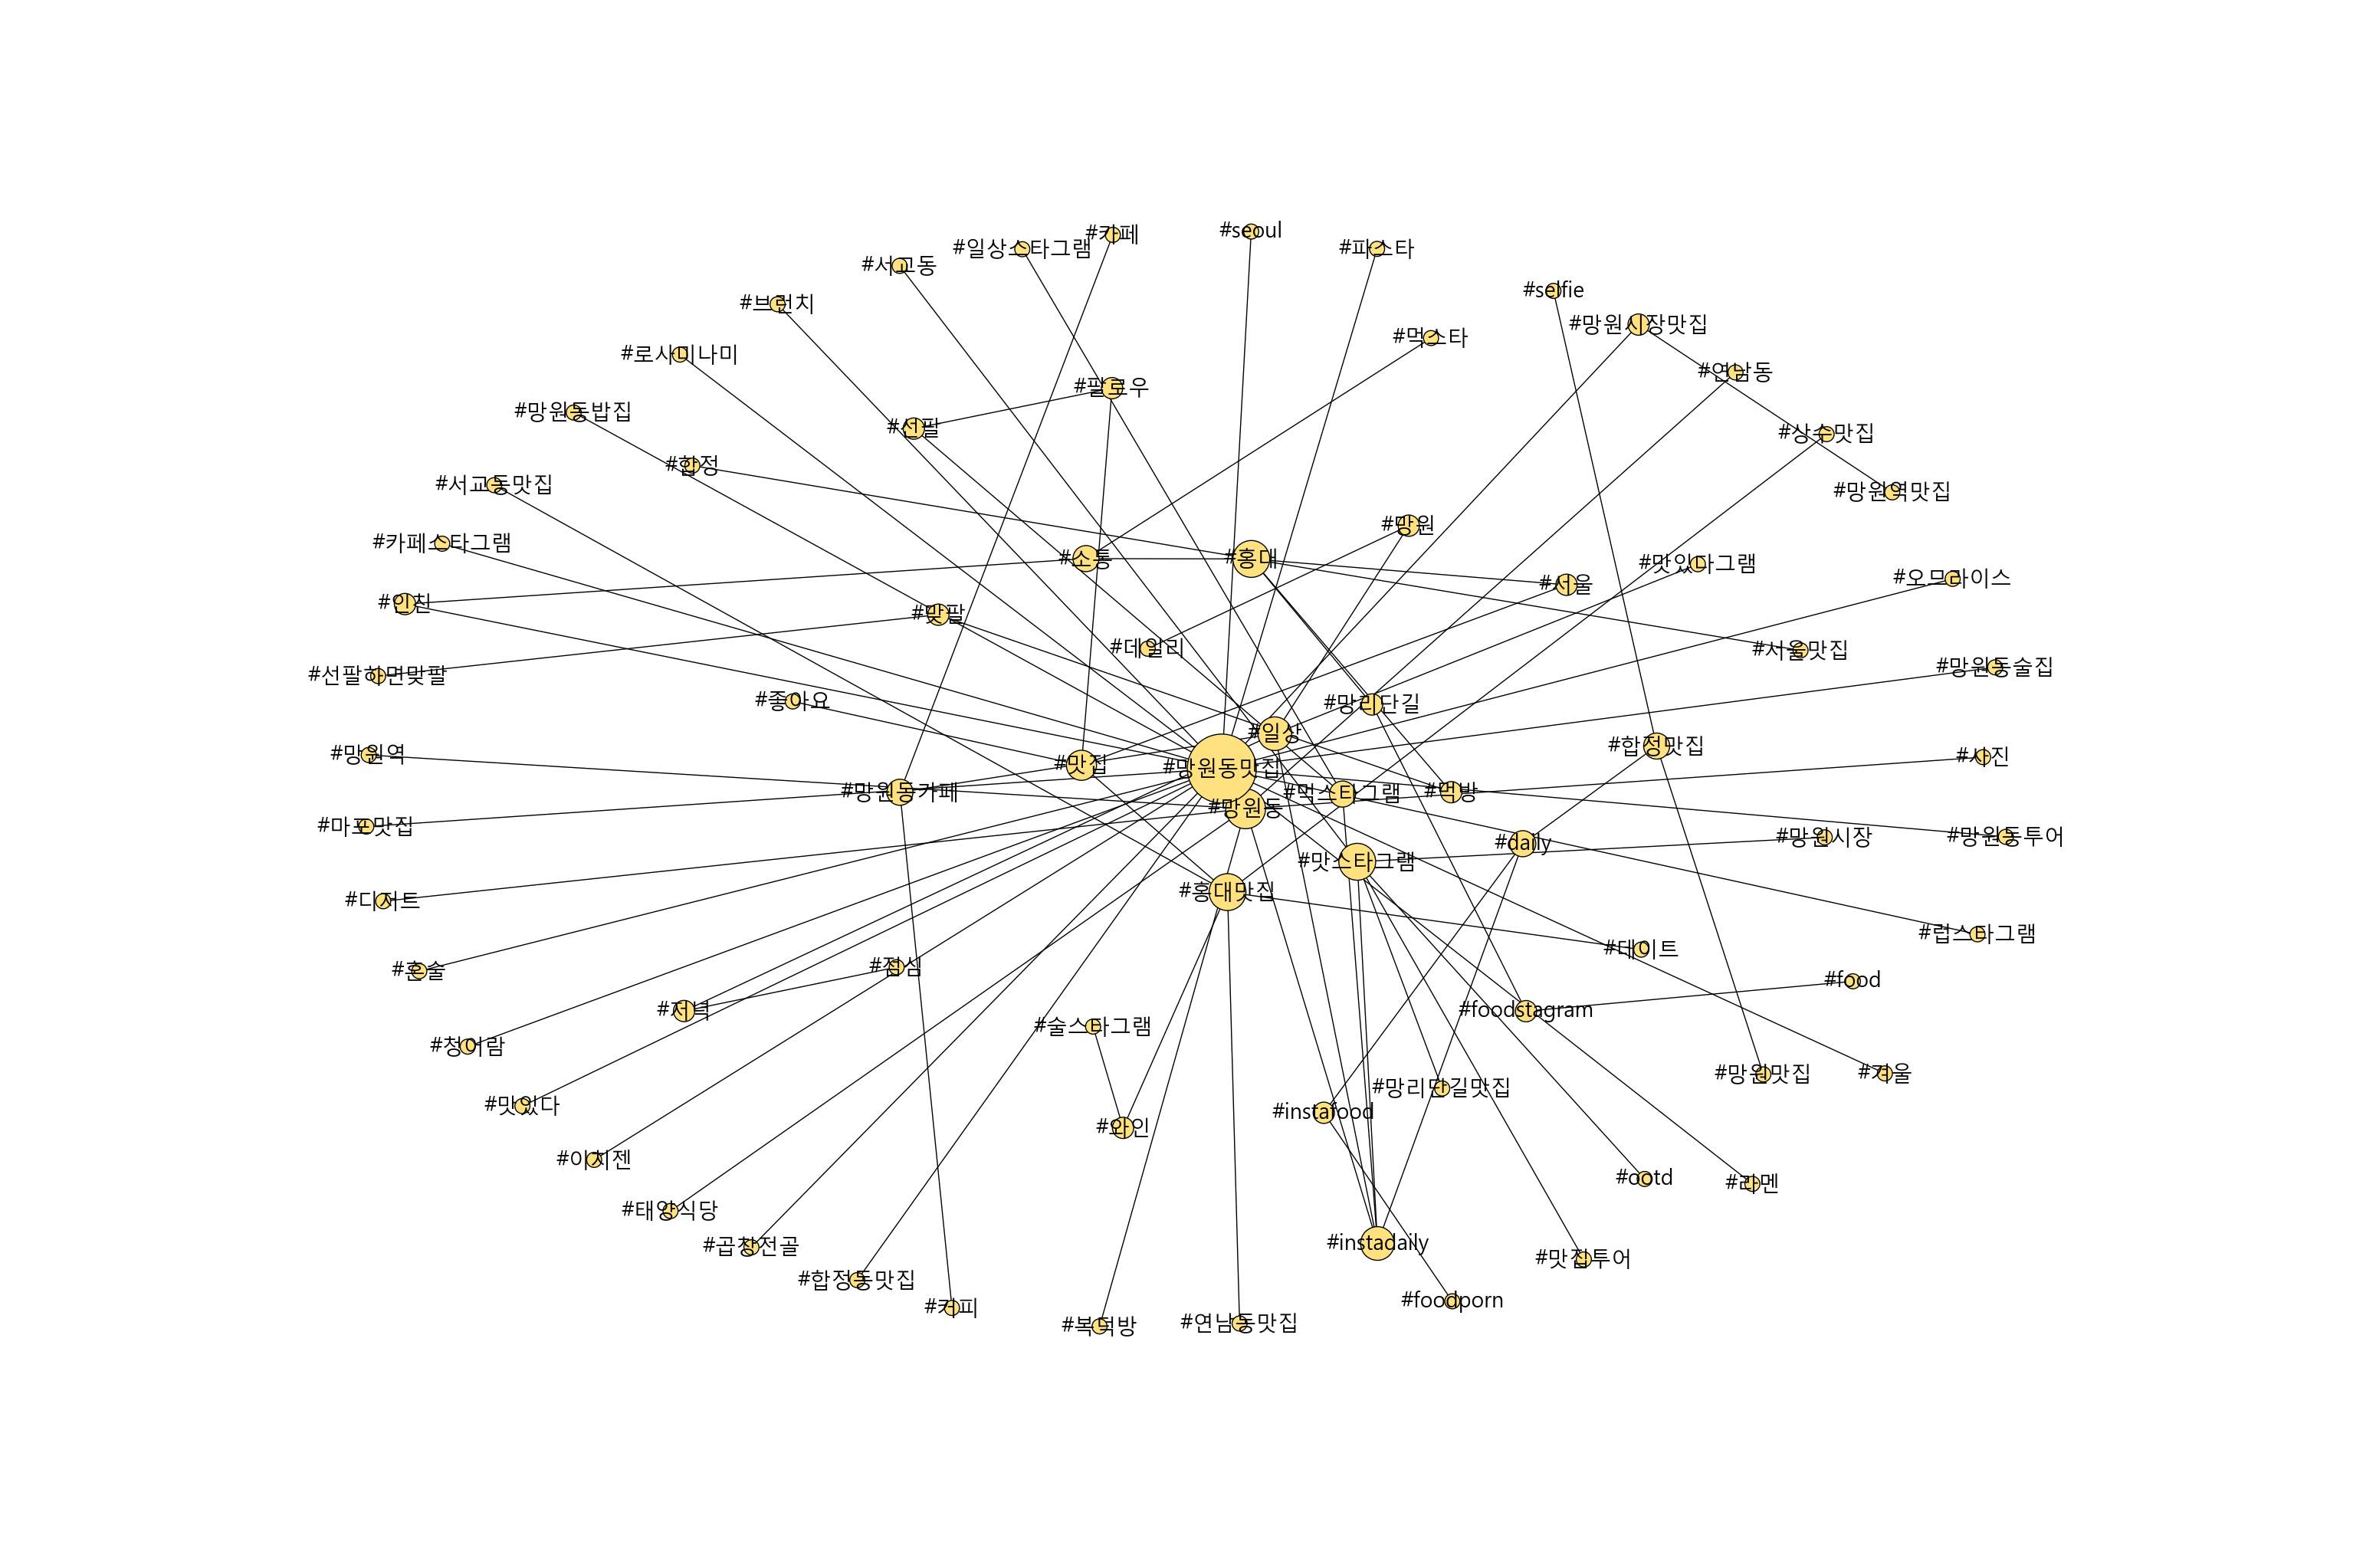

In [133]:
# 그래프 그리기

G= nx.Graph()

for word1, word2, count in sorted_word_coocs[:300]:    #상위 n개로만 그림 그리기
    G.add_edge(word1, word2, weight=count)
    
T = nx.minimum_spanning_tree(G)

nodes = nx.nodes(T)
degrees = nx.degree(T)

node_size = []

for node in nodes:
    ns = degrees[node]*200
    
    node_size.append(ns)
    
if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    fornt_name = "AppleGothic"
    
plt.figure(figsize=(30,20))    
nx.draw(T,
       pos=nx.fruchterman_reingold_layout(G, k=0.5),
       node_size=node_size,
       node_color="#FFE27F",
       font_family=font_name,
       label_pos=0, #0=head, 0.5=center, 1=tail
        with_labels=True,
        font_size=20 )
plt.savefig("./data_망원동SNA.png")
plt.axis("off")

plt.show()